# Some more data science

need to have:
numpy
matplotlib
umap-learn
scikit-learn
scipy

Shape of the data: (204000, 8)
Data type: float32
Number of dimensions: 2
First few rows of the data:
 [[-2.03126352e-02  6.34804845e-01  4.91202399e-02 -2.88585178e-03
  -7.52725974e-02 -1.63854170e+00 -2.69352078e+00  5.61744943e-02]
 [-5.63507667e-03  1.07312016e-01  5.82012534e-03  1.76328281e-03
   1.19400155e-02 -2.83108950e-01  7.78612792e-01 -3.97261232e-03]
 [-1.72514096e-02  1.90454483e+00 -4.35419641e-02 -5.56291230e-02
  -4.23848331e-02  7.08500147e-01  1.37315464e+00  6.57598749e-02]
 [ 2.75274385e-02  1.83976769e-01  1.18060103e-02  5.72993699e-03
  -1.29901636e-02 -7.03547418e-01  3.21502209e-01 -1.62674114e-05]
 [ 5.88624366e-02  2.83163041e-02  3.92393433e-02  1.75739788e-02
  -2.87650842e-02 -1.41330492e+00 -2.58635491e-01  1.85830630e-02]]


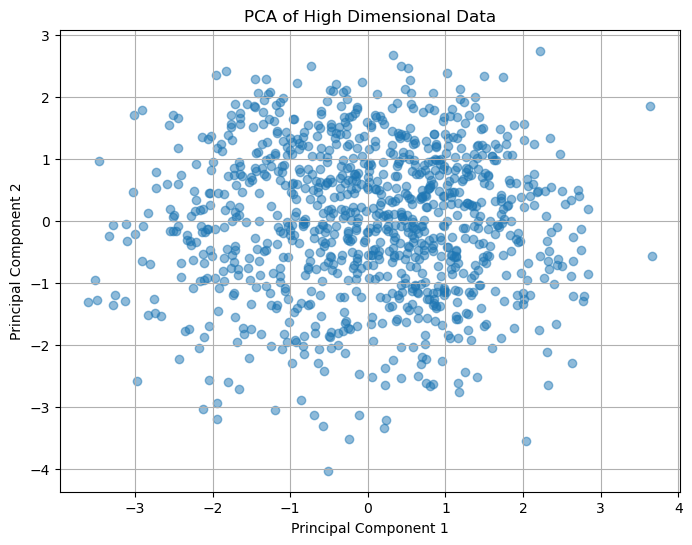

In [ ]:
# Code to explore how to use python to inspect high dimensional data
import numpy as np
import matplotlib.pyplot as plt
import pickle

# import 8 dimensional data which is stored in a .pickle file

with open('z.pkl', 'rb') as f:
    data = pickle.load(f)

# assess the shape of the data
print("Shape of the data:", data.shape)

# convert the data to a numpy array if it is not already
if not isinstance(data, np.ndarray):
    data = np.array(data)
# check the data type
print("Data type:", data.dtype)
# check the number of dimensions
print("Number of dimensions:", data.ndim)
# check the first few rows of the data
print("First few rows of the data:\n", data[:5])

# create a subset of the data to visualize
subset = data[:1000, :]

# Perform PCA to reduce the dimensionality to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(subset)
# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('PCA of High Dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()









/home/mbelouso/anaconda3/envs/bootcamp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mbelouso/anaconda3/envs/bootcamp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


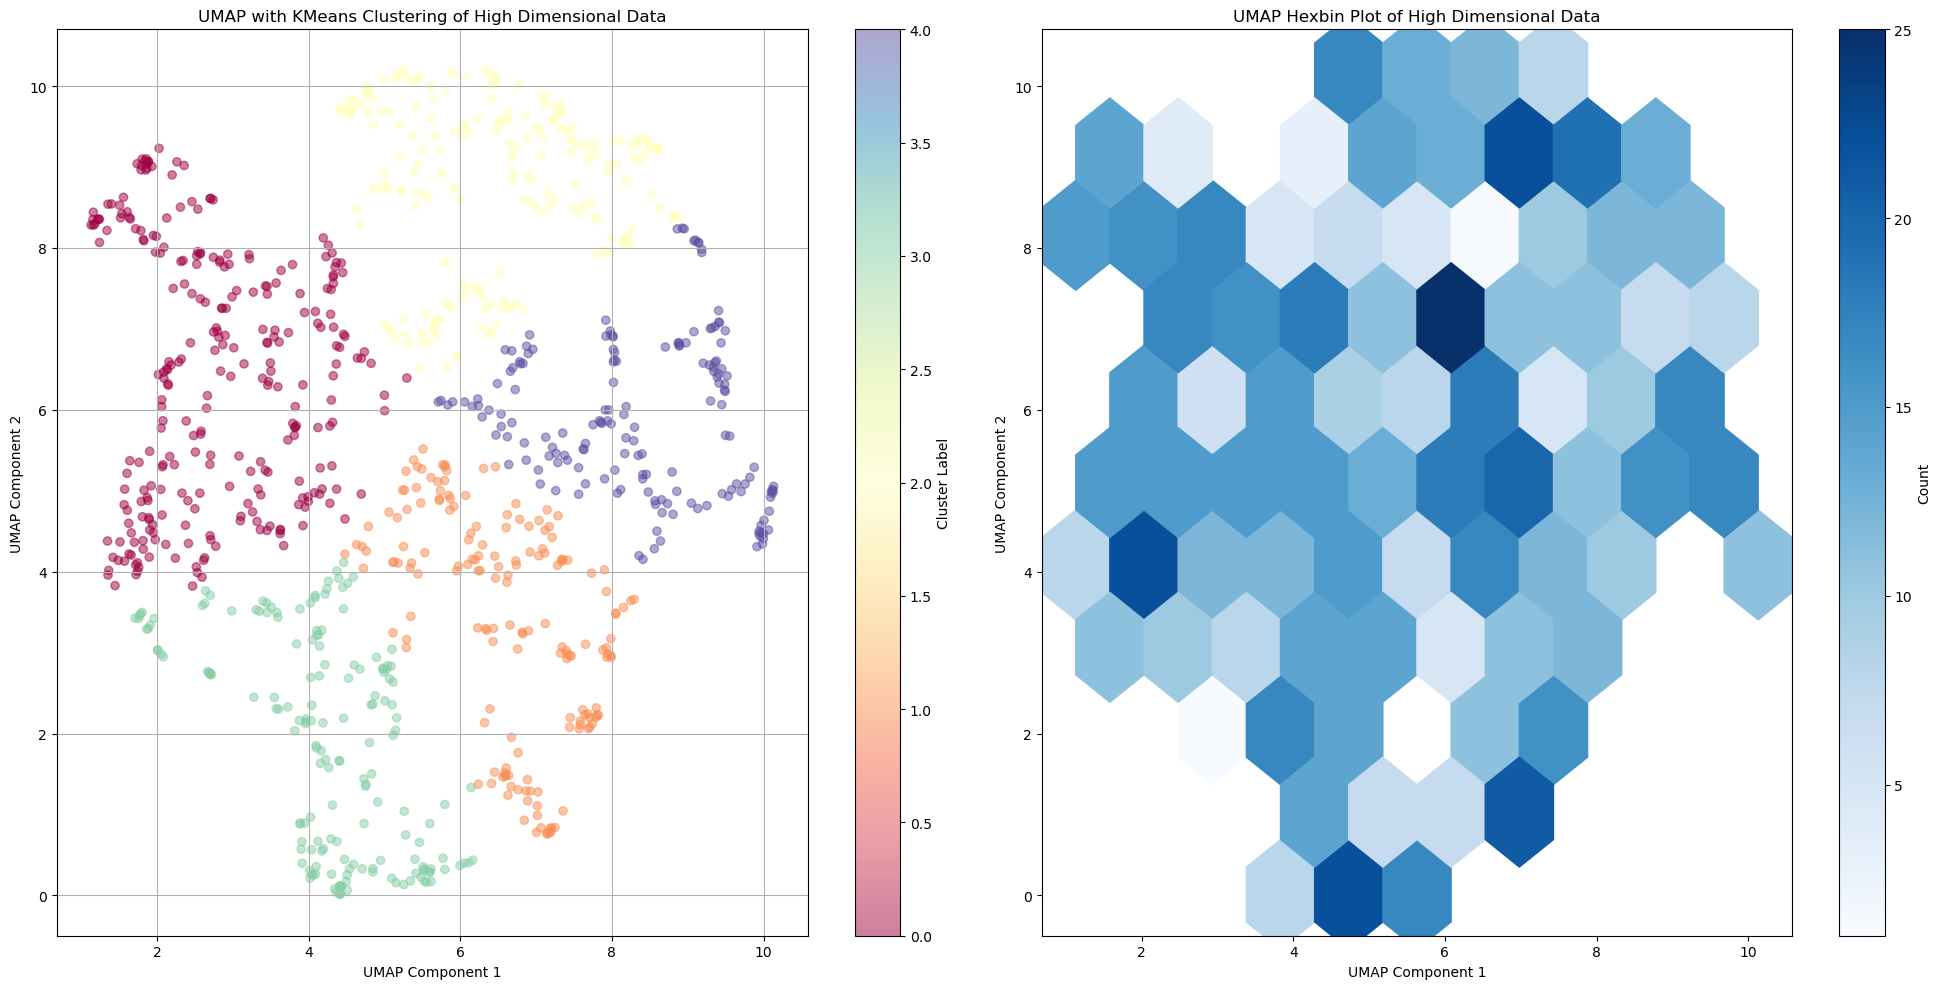

In [ ]:
# Perform UMAP to reduce the dimensionality to 2D for visualization
# After UMAP use K-means to cluster the data
import umap
from sklearn.cluster import KMeans

# Ensure UMAP and KMeans are installed
try:
    import umap
except ImportError:
    print("UMAP is not installed. Please install it using 'pip install umap-learn'.")
try:
    from sklearn.cluster import KMeans
except ImportError:
    print("KMeans is not available. Please install scikit-learn using 'pip install scikit-learn'.")
# Perform UMAP dimensionality reduction
if not isinstance(subset, np.ndarray):
    subset = np.array(subset)
# Check if the data is suitable for UMAP
if subset.ndim != 2 or subset.shape[1] < 2:
    raise ValueError("Data must be a 2D array with at least two features for UMAP.")


# Make a function to perform UMAP and KMeans clustering
def perform_umap_kmeans(data, n_clusters=5):
    # Perform UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_data = reducer.fit_transform(data)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(umap_data)

    return umap_data, labels


# Perform UMAP and KMeans clustering on the subset
umap_data, labels = perform_umap_kmeans(subset)
# Plot the UMAP results with KMeans clustering
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=labels, cmap='Spectral', alpha=0.5)
plt.title('UMAP with KMeans Clustering of High Dimensional Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()

plt.subplot(1, 2, 2)
# plot the UMAP data in hexbins
plt.hexbin(umap_data[:, 0], umap_data[:, 1], gridsize=10, cmap='Blues', mincnt=1)
plt.title('UMAP Hexbin Plot of High Dimensional Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()
plt.savefig('umap_kmeans_hexbin.png', dpi=300)
    


